# 광고그룹 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False  



In [3]:
filepath = r'D:\DevRoot\DataSet\네이버보고서.xls'

In [4]:
df = pd.read_excel(filepath, skiprows=[0])  # list 로 빼버릴 row 들 지정
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [6]:
len(df['광고그룹'].unique())

186

In [7]:
grouped = df.groupby('광고그룹')

In [8]:
grouped.size()

광고그룹
#000_마케팅 전체_main           48
001.BASIC DESIGN            9
001.데이터분석/ 통계              10
002.R                       9
002.UX/UI                   5
                           ..
포토샵 유치원_일러스트레이터 유치원        13
프로그래밍 유치원                   8
프로그래밍 전체                   12
프로그래밍 전체_파워컨텐츠_블록체인(삭제)     3
프론트엔드 개발 스쿨 12기_기존 키워드      1
Length: 186, dtype: int64

In [9]:
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [10]:
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.145833,8.400000,0.183898,625.086295,7243.958333
001.BASIC DESIGN,5738.555556,6.800000,0.232924,298.693822,2427.333333
001.데이터분석/ 통계,3715.000000,20.280000,0.890571,1021.473357,19575.600000
002.R,13413.777778,8.533333,0.111199,360.038462,4796.000000
002.UX/UI,3090.800000,4.080000,0.089340,69.928571,550.000000
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.692308,16.707692,0.050832,648.327517,15781.615385
프로그래밍 유치원,5921.625000,7.800000,0.224738,2032.326389,23617.000000
프로그래밍 전체,90375.000000,9.200000,0.024037,123.881559,1626.166667


In [12]:
grouped.median() # 중앙값

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.0,3.6,0.055948,765.972222,2458.5
001.BASIC DESIGN,5524.0,2.4,0.038716,357.500000,1023.0
001.데이터분석/ 통계,1813.0,13.8,0.573846,1096.795393,13464.0
002.R,5184.0,3.6,0.028016,119.166667,1287.0
002.UX/UI,2649.0,1.2,0.090600,73.333333,88.0
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.0,3.6,0.023327,852.500000,2706.0
프로그래밍 유치원,3748.0,3.0,0.121833,1763.819444,8002.5
프로그래밍 전체,3455.5,1.2,0.009331,130.497685,225.5


## 광고 그룹 기준 데이터 전처리

In [13]:
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756
002.R,120724,76.8,1.000794,3240.346154,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.660812,8428.257716,205161
프로그래밍 유치원,47373,62.4,1.797903,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.288445,1486.578704,19514


In [14]:
#↑ 결과 : 노출수, 클릭수, 총비용은 OK
# 그러나!  클릭률 과 평균클릭비용은 다시 재 계산할 필요가 있습니다.
#         위 둘은 걍 키워드에 대한 값이었기 때문.
#        왜냐하면 걍 '총 합' 이 계산된 것일뿐.. 

# 클릭률은 광고그룹에 대한 클릭률로 재계산되어야 하고
# 평균클릭비용도 광고그룹에 대한 클릭률로 재계산 되어야 한다.

In [15]:
df_group = grouped.sum()
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756
002.R,120724,76.8,1.000794,3240.346154,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.660812,8428.257716,205161
프로그래밍 유치원,47373,62.4,1.797903,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.288445,1486.578704,19514


In [ ]:
# 클릭률, 평균클릭비용 칼럼 전처리 
# as-is : 키워드에 대한 클릭률의 총합(sum), 키워드에 대한 평균클릭비용의 총합(sum)
# to-be : 광고그룹에 대한 클릭률, 광고그룹에 대한 평균클릭비용

In [16]:
# 클릭률 (ctr) = 클릭수 / 노출수

df_group['클릭률(%)'] = df_group['클릭수'] / df_group['노출수']
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,30004.142165,347710
001.BASIC DESIGN,51647,61.2,0.001185,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,0.005459,10214.733573,195756
002.R,120724,76.8,0.000636,3240.346154,43164
002.UX/UI,15454,20.4,0.001320,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.000232,8428.257716,205161
프로그래밍 유치원,47373,62.4,0.001317,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.000102,1486.578704,19514


In [17]:
# 평균클릭비용 (cpc) = 총비용 / 클릭수

df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)'] / df_group['클릭수']
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862.375992,347710
001.BASIC DESIGN,51647,61.2,0.001185,356.960784,21846
001.데이터분석/ 통계,37150,202.8,0.005459,965.266272,195756
002.R,120724,76.8,0.000636,562.031250,43164
002.UX/UI,15454,20.4,0.001320,134.803922,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.000232,944.571823,205161
프로그래밍 유치원,47373,62.4,0.001317,3027.820513,188936
프로그래밍 전체,1084500,110.4,0.000102,176.757246,19514


In [19]:
df_group.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.860000e+02,186.000000,186.000000,181.000000,1.860000e+02
mean,2.602676e+05,390.025806,0.002571,1540.196195,2.815427e+05
std,8.897371e+05,2066.998045,0.005009,1476.537463,6.747706e+05
min,1.071000e+03,0.000000,0.000000,55.000000,0.000000e+00
25%,1.397875e+04,12.000000,0.000318,500.156250,9.047500e+03
50%,4.384300e+04,51.600000,0.000920,965.266272,5.142500e+04
75%,1.310708e+05,136.500000,0.002279,2238.471503,2.873970e+05
max,9.683503e+06,20640.000000,0.039098,7432.222222,5.601926e+06


In [20]:
# 클릭수 칼럼 중 0 인 데이터가 존재 => 평균클릭비용 컬럼에 결측값 존재
df_group[df_group['클릭수'] == 0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,NaN,0
fin_camp_business_4,2136,0.0,0.0,NaN,0
fin_camp_rfs_9,1928,0.0,0.0,NaN,0
다함께 DDD 프로젝트,3689,0.0,0.0,NaN,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,NaN,0


In [21]:
# 위 결측값은 0 으로 대체, 
# fillna()

In [22]:
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [23]:
df_group[df_group['클릭수'] == 0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,0.0,0
fin_camp_business_4,2136,0.0,0.0,0.0,0
fin_camp_rfs_9,1928,0.0,0.0,0.0,0
다함께 DDD 프로젝트,3689,0.0,0.0,0.0,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,0.0,0


In [24]:
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862.375992,347710
001.BASIC DESIGN,51647,61.2,0.001185,356.960784,21846
001.데이터분석/ 통계,37150,202.8,0.005459,965.266272,195756
002.R,120724,76.8,0.000636,562.031250,43164
002.UX/UI,15454,20.4,0.001320,134.803922,2750


In [25]:
# 평균클릭비용 반올림 처리, 소숫점 제거

In [26]:
df_group['평균클릭비용(VAT포함,원)'] = round(df_group['평균클릭비용(VAT포함,원)'], 0)

In [27]:
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [28]:
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862,347710
001.BASIC DESIGN,51647,61.2,0.001185,357,21846
001.데이터분석/ 통계,37150,202.8,0.005459,965,195756
002.R,120724,76.8,0.000636,562,43164
002.UX/UI,15454,20.4,0.001320,135,2750


## 데이터 시각화

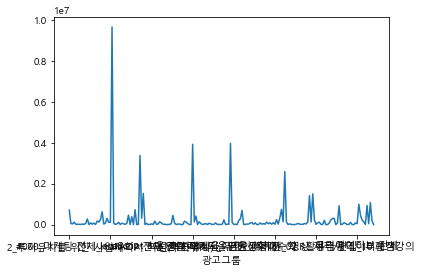

In [29]:
df_group['노출수'].plot()
plt.show()

In [30]:
# 지난번에 '키워드' 중심으로 데이터 시각화를 진행했을때는 인덱스를 기준으로 출력

# 정렬된 데이터를 기준으로 출력을 할겁니다
# 데이터를 오름차순 정렬
# 인덱스 재생성
# 그리고 시각화 !

In [31]:
df_group['노출수'].sort_values().reset_index()

,광고그룹,노출수
0,모바일 앱 UX/UI 디자인,1071
1,컴퓨터공학으로 풀어낸 블록체인 코어 CAMP,1188
2,1. 데이터분석입문_일반,1197
3,7_How to 벤처캐피탈,1257
4,올인원 패키지 : 디지털 마케팅_인스타광고,1377
...,...,...
181,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2598066
182,AOP 전체_중복키워드_디자인,3388256
183,ㅍAOP 전체_중복키워드_디자인(삭제),3936637
184,마케팅 전체,3984480


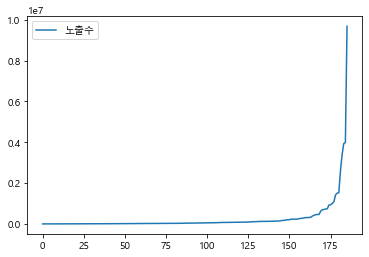

In [34]:
# 광고그룹 의 노출수 선그래프 (오름차순)
df_group['노출수'].sort_values().reset_index().drop('광고그룹', axis=1).plot()
plt.show()

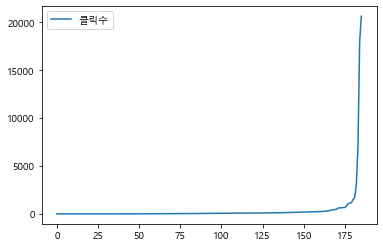

In [35]:
# 광고그룹 의 클릭수 선그래프 (오름차순)
df_group['클릭수'].sort_values().reset_index().drop('광고그룹', axis=1).plot()
plt.show()

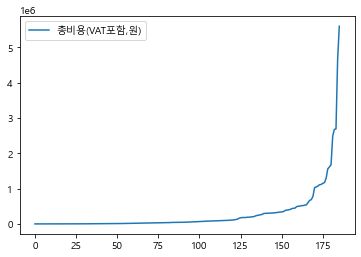

In [36]:
# 광고그룹 의 총비용 선그래프 (오름차순)
df_group['총비용(VAT포함,원)'].sort_values().reset_index().drop('광고그룹', axis=1).plot()
plt.show()

## 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹을 다음과 같이 정하고 추출해봅니다
 1. 상위20%(노출수 80백분위수 이상)
 2. 상위10%(클릭수 90백분위수 이상)

In [37]:
imp = df_group['노출수']
clk = df_group['클릭수']

In [38]:
imp

광고그룹
#000_마케팅 전체_main            709447
001.BASIC DESIGN             51647
001.데이터분석/ 통계                37150
002.R                       120724
002.UX/UI                    15454
                            ...   
포토샵 유치원_일러스트레이터 유치원         937205
프로그래밍 유치원                    47373
프로그래밍 전체                   1084500
프로그래밍 전체_파워컨텐츠_블록체인(삭제)     196060
프론트엔드 개발 스쿨 12기_기존 키워드        2015
Name: 노출수, Length: 186, dtype: int64

In [39]:
clk

광고그룹
#000_마케팅 전체_main            403.2
001.BASIC DESIGN             61.2
001.데이터분석/ 통계               202.8
002.R                        76.8
002.UX/UI                    20.4
                            ...  
포토샵 유치원_일러스트레이터 유치원         217.2
프로그래밍 유치원                    62.4
프로그래밍 전체                    110.4
프로그래밍 전체_파워컨텐츠_블록체인(삭제)    7033.2
프론트엔드 개발 스쿨 12기_기존 키워드        2.4
Name: 클릭수, Length: 186, dtype: float64

In [40]:
result = df_group[(imp >= imp.quantile(0.8)) & (clk >= clk.quantile(0.9))]
result

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862,347710
1. 코딩,630038,673.2,0.001069,2490,1676125
3. html,9683503,829.2,0.000086,1389,1151601
6. 파이썬,465292,488.4,0.001050,3192,1559107
AOP 전체_중복키워드_디자인,3388256,1174.8,0.000347,2120,2490708
AOP 전체_중복키워드_비지니스,1528568,634.8,0.000415,1762,1118678
ㅍAOP 전체_중복키워드_디자인(삭제),3936637,1051.2,0.000267,2561,2692591
마케팅 전체,3984480,421.2,0.000106,227,95546
올인원 패키지 : 데이터 분석 입문 온라인_파콘,742689,3079.2,0.004146,524,1614151


In [41]:
# 중점관리 광고그룹!
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
 1. 노출수 80백분위수 미만
 2. 클릭수 90백분위수 미만
 3. 총비용 60백분위수 이상
 4. 총비용 90백분위수 미만

In [42]:
cost = df_group['총비용(VAT포함,원)']

In [44]:
result = df_group[(imp < imp.quantile(0.8)) & (clk < clk.quantile(0.9)) & (cost >= cost.quantile(0.6)) & (cost < cost.quantile(0.9))]  
result

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
001.데이터분석/ 통계,37150,202.8,0.005459,965,195756
002.마케팅 입문,20372,188.4,0.009248,570,107371
003.퍼포먼스 마케팅,10453,164.4,0.015728,3152,518177
1. 전체,124351,128.4,0.001033,1409,180906
2. 프로그래밍,109531,182.4,0.001665,2239,408364
5. 자료구조,40328,46.8,0.001160,4317,202037
AOP 전체_중복키워드_공통,4336,66.0,0.015221,4624,305195
AOP 전체_중복키워드_데이터사이언스,14439,56.4,0.003906,4728,266640
AOP 전체_중복키워드_프로그래밍,7580,39.6,0.005224,7432,294316


In [45]:
# 저효율 광고그룹
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')